## Testing HCF Model

#### Obtain refractive index

/Users/jackmorse/Documents/University/Year 4/FYP/Modules/Refractive_Indices


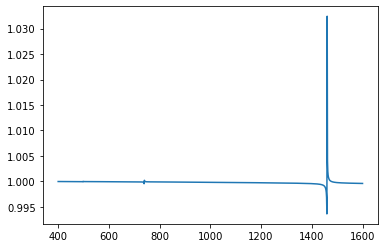

In [1]:
import os
import sys

current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
add_to_path = os.path.join(parent_directory, "Modules/Refractive_Indices")
os.listdir(parent_directory)
print(add_to_path)
sys.path.append(add_to_path)
import RefractiveIndexClass
import numpy as np
import matplotlib.pyplot as plt

wavelengths = np.linspace(400, 1600, 1000)
index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=wavelengths, part="R")
plt.plot(wavelengths, index)

#### Obtain the GVD

Recall the GVD is: $$\frac{d^2 \beta}{d \omega^2}$$
We will give arguments wavelengths in nm and refractive index. We will have to perform the CDA to obtain the second derivative.

In [5]:
def CDA2(func_vals, step_size):
    '''
    Performs the second order derivative using centered difference approximation. FDA and BDA (Ord(h^2)) obtained at https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf
    
    ! Step size must be the same as the grid step. !
    '''
    second_derivative = []
    last_point = len(func_vals) - 1
    second_derivative.append((1 / (step_size**2)) * (2 * func_vals[0] - 5 * func_vals[1] + 4 * func_vals[2] - func_vals[3]))
    # second_derivative.append((1 / (step_size**2)) * (func_vals[2] - 2 * func_vals[1] + func_vals[0])) # If the FDA ever fails use these.
    for i in range(1, last_point):
        second_derivative.append((1 / (step_size**2)) * (func_vals[i + 1] + func_vals[i - 1] - 2 * func_vals[i]))
    # second_derivative.append((1 / (step_size**2)) * (func_vals[last_point] - 2 * func_vals[last_point - 1] + func_vals[last_point - 2])) # If the BDA ever fails use these.
    second_derivative.append((1 / (step_size**2)) * (2 * func_vals[last_point] - 5 * func_vals[last_point - 1] + 4 * func_vals[last_point - 2] - func_vals[last_point - 3]))
    return second_derivative

def CDA1(func_vals, step_size):
    '''
    Performs the second order derivative using centered difference approximation. FDA and BDA (Ord(h^2)) obtained at https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf

    ! Step size must be the same as the grid step. !
    '''
    first_derivative = []
    last_point = len(func_vals) - 1
    first_derivative.append((1 / (2 * step_size)) * (-3 * func_vals[0] + 4 * func_vals[1] - func_vals[2] - func_vals[3]))
    for i in range(1, last_point):
        first_derivative.append((1 / (2 * step_size)) * (func_vals[i + 1] - func_vals[i - 1]))
    # first_derivative.append((1 / (step_size)) * (func_vals[last_point] - func_vals[last_point - 1]))
    first_derivative.append((1 / (2 * step_size)) * (3 * func_vals[last_point] - 4 * func_vals[last_point - 1] + func_vals[last_point - 2]))
    return first_derivative

[-1.7851609399329568e-06, 2.1079391172640447e-07, 1.5941289574309014e-06, 6.534611263518539e-06, 1.8984626674859083e-05, 4.447751537427029e-05, 9.01275718825201e-05, 0.00016463004505831965, 0.00027826113809833515, 0.00044287800853717104, 0.0006719187682473938, 0.0009804024834394985, 0.0013849291746619312, 0.0019036798168011447, 0.0025564163390814267, 0.00336448162506512, 0.004350799512652432, 0.0055398747940816045, 0.006957793215928722, 0.008632221479107817, 0.01059240723887123, 0.012869179104808597, 0.015494946640848052, 0.018503700365255355, 0.021931011750634163, 0.025814033223927012, 0.030191498166412783, 0.03510372091370962, 0.04059259675577285, 0.04670160193689566, 0.05347579365571128, 0.0609618100651873, 0.06920787027263207, 0.0782637743396905, 0.0881809032823451, 0.0990122190709203, 0.11081226463007193, 0.12363716383879882, 0.13754462153043515, 0.1525939234926527, 0.168845936467468, 0.18636310815122664, 0.20520946719461047, 0.22545062320264844, 0.24715376673470948, 0.27038766930

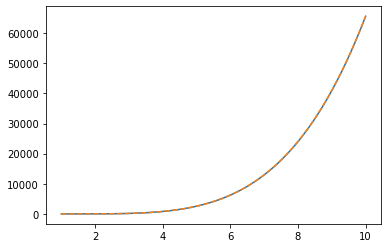

In [14]:
x = np.linspace(1, 10, 1000)
def y(x):
    return 2*(x-1)**5
y(x)[1000 - 1]


ypp = CDA1(y(x), step_size=x[1] - x[0])
print(ypp)
import matplotlib.pyplot as plt 
len(ypp)
plt.plot(x, ypp)
plt.plot(x, 2*5*(x-1)**4, '--')

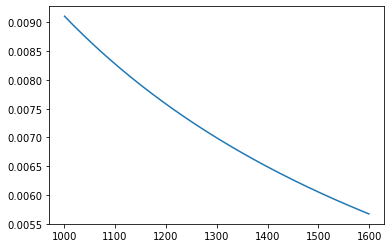

In [26]:
def beta_lambda(refractive_index, wavelengths):
    beta = []
    for i in range(len(refractive_index)):
        beta.append(2 * np.pi * refractive_index[i] / wavelengths[i])
    return beta

def GVD_lambda(beta, wavelengths):
    first_derivative = CDA1(beta, wavelengths[1] - wavelengths[0])
    second_derivative = CDA2(beta, wavelengths[1] - wavelengths[0])
    GVD = []
    for i in range(len(beta)):
        GVD.append( ((wavelengths[i]**3) / ((2 * np.pi * 3e17)**2)) * (3 * first_derivative[i] + wavelengths[i] * second_derivative[i]) )
    return GVD

n_fs = RefractiveIndexClass.RefractiveIndex.n_fs
wavelengths = np.linspace(1000, 1600, 1000)
beta = beta_lambda(n_fs(wavelengths), wavelengths)
GVD = GVD_lambda(beta, wavelengths)
len(GVD)
plt.plot(wavelengths[1: len(wavelengths) - 1], beta[1: len(wavelengths) - 1])
